In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Reading and transforming the file
#cityev2 = pd.read_csv('cityev_q221.csv')
#chargedset = pd.read_csv('chrgDataSet.csv')
#coloradodset = pd.read_csv('coloradodataset.csv')
iea_ev = pd.read_csv('iea-ev-data.csv')
df=iea_ev[iea_ev['parameter']=='EV sales']
df.region.unique()

array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Denmark', 'Europe', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'India', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Other Europe', 'Poland',
       'Portugal', 'Rest of the world', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'USA', 'World'], dtype=object)

In [4]:
df_usa=df[df['region']=='USA']
df_usa["annual_sales"] = df.groupby(["year"])["value"].transform(sum)

In [8]:
df_usa

,year,annual_sales
6331,2010,2.269590e+04
6339,2011,1.117930e+05
6349,2012,2.662680e+05
6357,2013,4.398610e+05
6367,2014,7.145970e+05
6375,2015,1.364184e+06
6391,2016,1.820409e+06
6399,2017,2.770790e+06
6415,2018,4.499025e+06
6423,2019,4.526452e+06


In [5]:
df_usa.drop_duplicates(subset = ['annual_sales'],keep='last',inplace=True)

In [6]:
df_usa.drop(['region','category','parameter','mode','powertrain','unit','value'],axis=1,inplace=True)

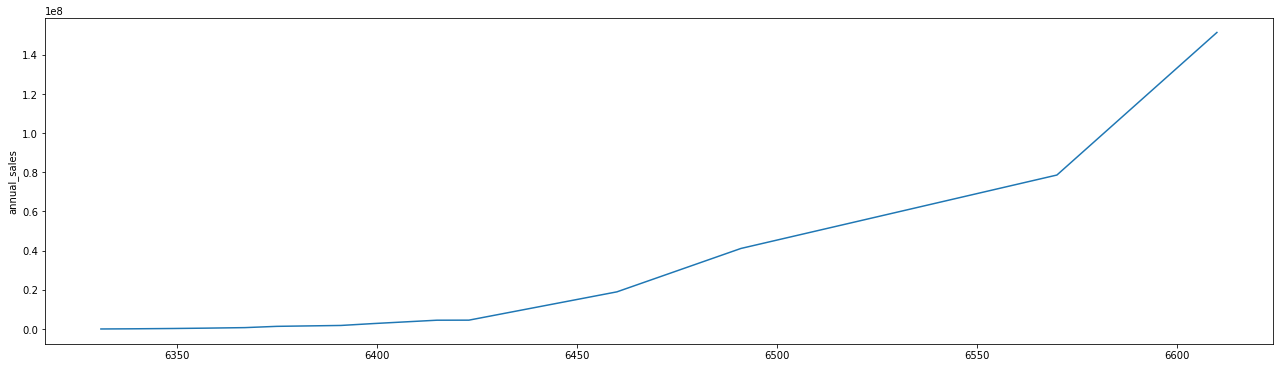

In [7]:
pd.set_option('display.float_format',lambda x: '%.9f' % x)
pd.reset_option('display.float_format', silent=True)
plt.figure(figsize=(22,6))
sns.lineplot(x=df_usa.index, y=df_usa['annual_sales'])
plt.show()